In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action = 'ignore')

In [139]:
recruitment_df = pd.read_csv("Recruitment_Data.csv")

In [140]:
recruitment_df

,attrition,performance_rating,sales_quota_pct,recruiting_source,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1,3,1.088190,Applied Online,NaN,NaN,NaN,NaN,NaN,NaN
1,0,3,2.394173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,0.497530,Campus,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,2.513958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,1.424789,Applied Online,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
441,0,3,1.627813,Campus,NaN,NaN,NaN,NaN,NaN,NaN
442,1,4,0.689682,Referral,NaN,NaN,NaN,NaN,NaN,NaN
443,0,4,1.196198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,0,4,1.598213,Applied Online,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
recruitment_df.shape

(446, 10)

In [142]:
recruitment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
 4   Unnamed: 4          0 non-null      float64
 5   Unnamed: 5          0 non-null      float64
 6   Unnamed: 6          0 non-null      float64
 7   Unnamed: 7          0 non-null      float64
 8   Unnamed: 8          0 non-null      float64
 9   Unnamed: 9          0 non-null      float64
dtypes: float64(7), int64(2), object(1)
memory usage: 35.0+ KB


In [143]:
per_null = round(100*recruitment_df.isnull().mean(),2)

In [144]:
per_null

attrition               0.00
performance_rating      0.00
sales_quota_pct         0.00
recruiting_source      45.96
Unnamed: 4            100.00
Unnamed: 5            100.00
Unnamed: 6            100.00
Unnamed: 7            100.00
Unnamed: 8            100.00
Unnamed: 9            100.00
dtype: float64

In [145]:
mode_recruitment_source = (per_null[per_null>40])

In [146]:
mode_recruitment_source

recruiting_source     45.96
Unnamed: 4           100.00
Unnamed: 5           100.00
Unnamed: 6           100.00
Unnamed: 7           100.00
Unnamed: 8           100.00
Unnamed: 9           100.00
dtype: float64

In [147]:
mode_recruitment_source = recruitment_df["recruiting_source"].mode()

In [148]:
recruitment_df["recruiting_source"] = recruitment_df["recruiting_source"].fillna(mode_recruitment_source[0])

In [149]:
recruitment_df.head(5)

,attrition,performance_rating,sales_quota_pct,recruiting_source,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1,3,1.088190,Applied Online,NaN,NaN,NaN,NaN,NaN,NaN
1,0,3,2.394173,Applied Online,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,0.497530,Campus,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,2.513958,Applied Online,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,1.424789,Applied Online,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
recruitment_df["recruiting_source"].isnull().mean()

0.0

In [151]:
recruitment_df.describe()

,attrition,performance_rating,sales_quota_pct,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,446.000000,446.000000,446.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.213004,2.894619,1.082607,NaN,NaN,NaN,NaN,NaN,NaN
std,0.409891,0.683755,0.710042,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,-0.710827,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,0.584444,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,1.070143,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,3.000000,1.532488,NaN,NaN,NaN,NaN,NaN,NaN
max,1.000000,5.000000,3.666740,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
null_vals = recruitment_df.isnull()

In [153]:
null_cols = null_vals.all()

In [154]:
null_cols

attrition             False
performance_rating    False
sales_quota_pct       False
recruiting_source     False
Unnamed: 4             True
Unnamed: 5             True
Unnamed: 6             True
Unnamed: 7             True
Unnamed: 8             True
Unnamed: 9             True
dtype: bool

In [155]:
recruitment_df.columns[null_cols]

Index(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9'],
      dtype='object')

In [162]:
null_cols = recruitment_df.isnull().any()

In [163]:
cols_to_drop = null_cols[null_cols].index

In [164]:
recruitment_df.drop(cols_to_drop, axis=1, inplace=True)

In [165]:
recruitment_df

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,Applied Online
2,1,2,0.497530,Campus
3,0,2,2.513958,Applied Online
4,0,3,1.424789,Applied Online
...,...,...,...,...
441,0,3,1.627813,Campus
442,1,4,0.689682,Referral
443,0,4,1.196198,Applied Online
444,0,4,1.598213,Applied Online


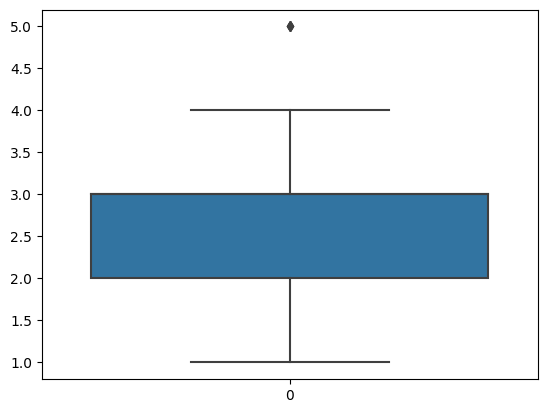

In [166]:
# Checking Whiskers in performance_rating column

sns.boxplot(recruitment_df["performance_rating"])
plt.show()

In [172]:
# Checking outliers using Inter Quartile Range with performance_rating

performance_rating_q1 = 2.00
performance_rating_q3 = 3.00
performance_rating_iqr = performance_rating_q3 - performance_rating_q1
performance_rating_upper = performance_rating_q3 + 1.5 * 1.00
performance_rating_lower = performance_rating_q3 - 1.5 * 1.00

In [168]:
performance_rating_iqr

1.0

In [173]:
performance_rating_upper

4.5

In [176]:
performance_rating_lower

1.5

In [177]:
# Calculating performance rating upper

for i in recruitment_df["performance_rating"]:
  if i > performance_rating_upper:
    i = performance_rating_upper

recruitment_df["performance_rating"]

0      3
1      3
2      2
3      2
4      3
      ..
441    3
442    4
443    4
444    4
445    2
Name: performance_rating, Length: 446, dtype: int64

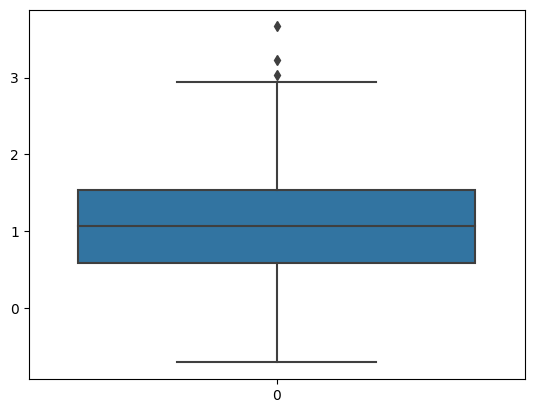

In [179]:
# Checking Whiskers in sales_quota_pct column

sns.boxplot(recruitment_df["sales_quota_pct"])
plt.show()

In [180]:
# Checking outliers using Inter Quartile Range with sales_quota_pct

sales_quota_rating_q1 = 0.60
sales_quota_rating_q3 = 1.55
sales_quota_rating_iqr = sales_quota_rating_q3 - sales_quota_rating_q1
sales_quota_rating_upper = sales_quota_rating_q3 + 1.5 * 1.00
sales_quota_rating_lower = sales_quota_rating_q1 - 1.5 * 1.00

In [181]:
sales_quota_rating_iqr

0.9500000000000001

In [183]:
sales_quota_rating_upper

3.05

In [184]:
sales_quota_rating_lower

-0.9

In [186]:
# Extracting data where attrition = 0 and sales_quota_pct = 1

more_focus = recruitment_df[(recruitment_df["attrition"] == 0) & (recruitment_df["sales_quota_pct"] > 1.532488)]

In [189]:
# This requirement was asked in component where attrition is less and sales_quota_pct is more where 
# In this I have choosen only those slaes_quota_pct who are more then the average 1.532488 or attrition = 0

more_focus

,attrition,performance_rating,sales_quota_pct,recruiting_source
1,0,3,2.394173,Applied Online
3,0,2,2.513958,Applied Online
9,0,3,2.073528,Applied Online
10,0,3,2.189803,Applied Online
15,0,3,1.635205,Applied Online
...,...,...,...,...
424,0,4,1.964209,Applied Online
435,0,3,1.915418,Applied Online
436,0,4,2.164957,Applied Online
441,0,3,1.627813,Campus


## **INSIGHTS**

#### According to the output there are only 90 rows where we need to focus more.

## **GROUPING DATASET**

In [190]:
# Grouping data based on recruiting_source column

grouping_recruit = recruitment_df.groupby(["recruiting_source"]).groups

applied_online = grouping_recruit['Applied Online']
campus = grouping_recruit['Campus']
referral = grouping_recruit['Referral']
search_firm = grouping_recruit['Search Firm']

In [191]:
# Based on grouped data extracting Applied Online

recruitment_df.groupby(["recruiting_source"]).get_group("Applied Online").head(10)

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,Applied Online
3,0,2,2.513958,Applied Online
4,0,3,1.424789,Applied Online
6,1,3,0.794213,Applied Online
9,0,3,2.073528,Applied Online
10,0,3,2.189803,Applied Online
11,0,2,0.276887,Applied Online
13,0,3,0.362379,Applied Online
14,0,2,1.259365,Applied Online


In [192]:
recruitment_df.groupby(["recruiting_source"]).get_group("Campus").head(10)

,attrition,performance_rating,sales_quota_pct,recruiting_source
2,1,2,0.497530,Campus
8,0,3,1.519917,Campus
12,0,4,0.860353,Campus
18,0,3,0.313106,Campus
28,0,3,1.218996,Campus
57,1,2,-0.020179,Campus
65,0,2,1.436988,Campus
66,0,3,-0.061590,Campus
80,0,3,0.502660,Campus
104,1,4,3.030340,Campus


In [193]:
# Based on grouped data extracting Referral

recruitment_df.groupby(["recruiting_source"]).get_group("Referral").head(10)

,attrition,performance_rating,sales_quota_pct,recruiting_source
5,1,3,0.548123,Referral
7,0,2,1.006524,Referral
25,0,3,0.988873,Referral
44,0,2,1.001372,Referral
47,1,3,0.195860,Referral
89,0,3,0.825791,Referral
94,0,2,1.327003,Referral
99,0,3,2.483459,Referral
112,0,3,0.793227,Referral
119,1,1,2.120180,Referral


In [194]:
# Based on grouped data extracting Search Firm

recruitment_df.groupby(["recruiting_source"]).get_group("Search Firm")

,attrition,performance_rating,sales_quota_pct,recruiting_source
27,1,2,1.867939,Search Firm
38,0,3,1.294592,Search Firm
105,1,3,1.258933,Search Firm
122,0,3,-0.064948,Search Firm
162,1,2,-0.628092,Search Firm
227,1,3,1.595868,Search Firm
311,0,3,1.325476,Search Firm
329,0,2,0.678046,Search Firm
395,1,3,1.352784,Search Firm
406,0,3,0.189004,Search Firm


In [195]:
# Calulating mean using groupby function in recruiting_source

recruitment_df.groupby(["recruiting_source"]).mean()

,attrition,performance_rating,sales_quota_pct
recruiting_source,,,
Applied Online,0.176119,2.901493,1.125609
Campus,0.285714,2.928571,0.908035
Referral,0.333333,2.844444,1.023198
Search Firm,0.500000,2.700000,0.886960


In [196]:
# Checking count of attrition using groupby function

recruitment_df.groupby(["recruiting_source", "attrition"])["performance_rating"].count()

recruiting_source  attrition
Applied Online     0            276
                   1             59
Campus             0             40
                   1             16
Referral           0             30
                   1             15
Search Firm        0              5
                   1              5
Name: performance_rating, dtype: int64

In [197]:
recruitment_df.head(3)

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,Applied Online
2,1,2,0.497530,Campus


## **DATA VISUALIZATION**

### **Univariate Analysis**

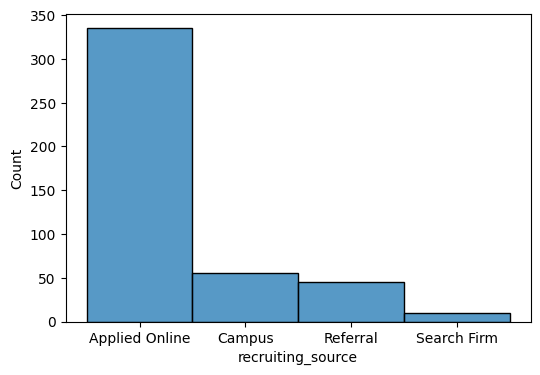

In [198]:
plt.figure(figsize=(6,4))
sns.histplot(recruitment_df['recruiting_source'])
plt.show()

### **INSIGHTS**

#### Around 77% people where choosen online medium to apply. 

### **BIVARIATE ANALYSIS**

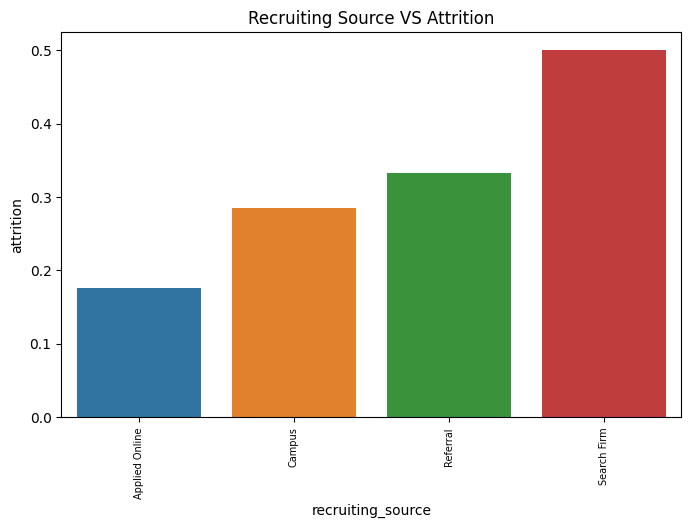

In [199]:
plt.figure(figsize=(8,5))
sns.barplot(data=recruitment_df, x="recruiting_source", y="attrition", ci=None)
plt.xticks(rotation=90, fontsize=7)
plt.title("Recruiting Source VS Attrition")
plt.show()

#### **INSIGHTS**

#### The graph shows that Applied Online is very close to 0, which indicates that the online recruitment approach is superior recruitment method than the others.

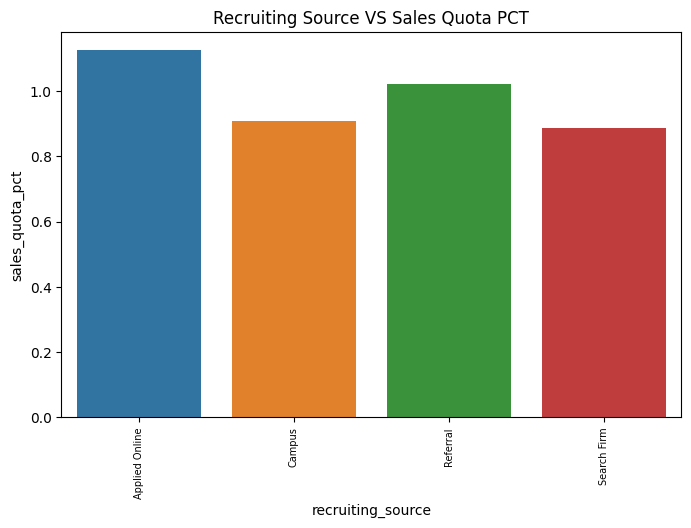

In [200]:
plt.figure(figsize=(8,5))
sns.barplot(data=recruitment_df, x="recruiting_source", y="sales_quota_pct", ci=None)
plt.xticks(rotation=90, fontsize=7)
plt.title("Recruiting Source VS Sales Quota PCT")
plt.show() 

#### **INSIGHTS**

#### When compared to personnel chosen from other sources, those chosen through "Applied Online" have increased the company's revenues.

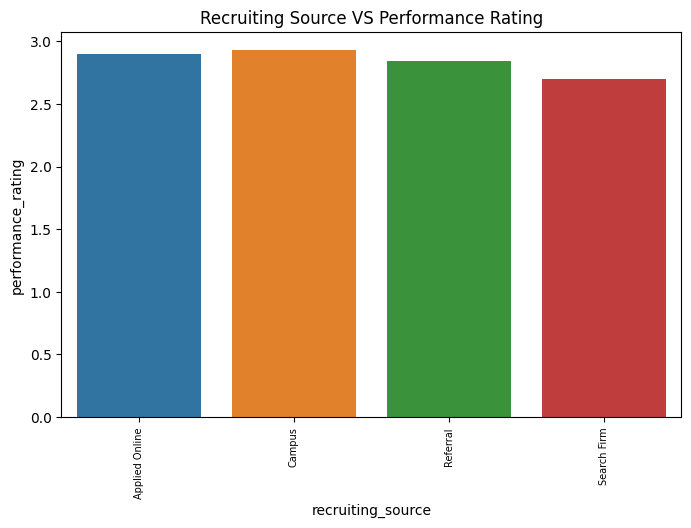

In [201]:
plt.figure(figsize=(8,5))
sns.barplot(data=recruitment_df, x="recruiting_source", y="performance_rating", ci=None)
plt.xticks(rotation=90, fontsize=7)
plt.title("Recruiting Source VS Performance Rating")
plt.show() 

### **INSIGHTS**

#### Based on this graph we conclude Applied Online, Campus and Refferal are almost same in performance then Search Firm.

---



### **MULTIVARIATE ANALYSIS**

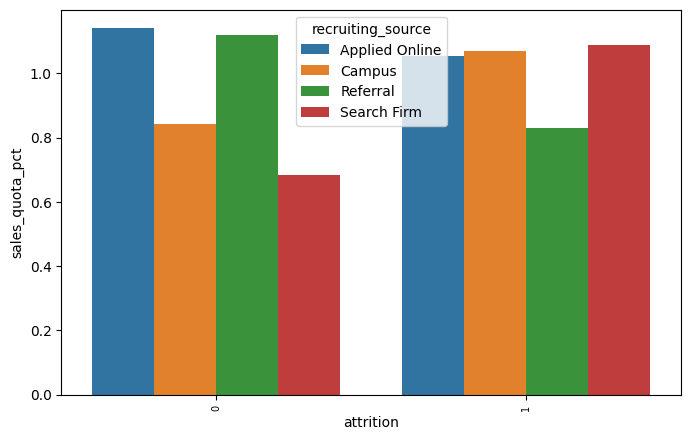

In [202]:
plt.figure(figsize=(8,5))
sns.barplot(data=recruitment_df, x="attrition", y="sales_quota_pct", hue="recruiting_source", ci=None)
plt.xticks(rotation=90, fontsize=7)
plt.show() 

### **INSIGHTS**

#### More sales have been generated for the company by "Applied Online" personnel than by employees from other sources.

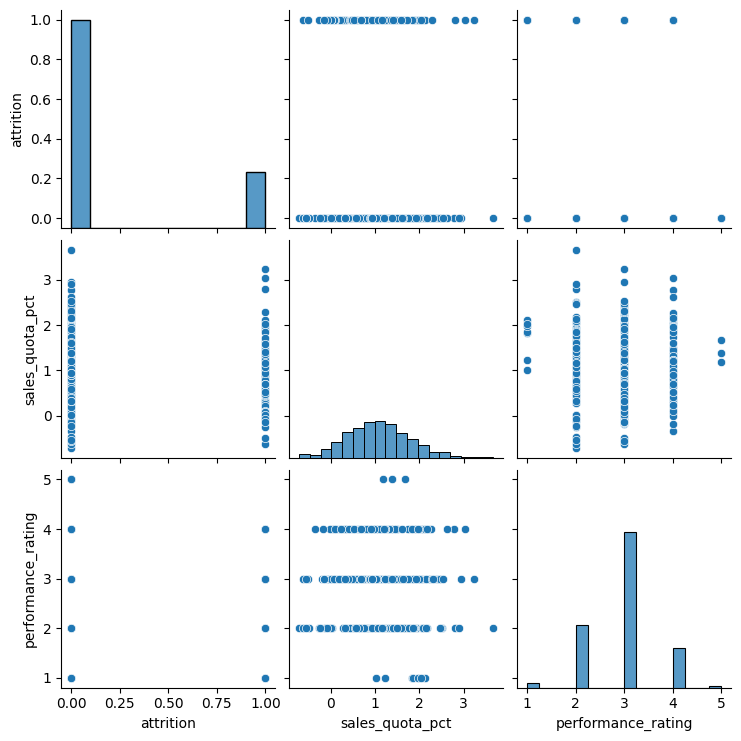

In [203]:
corr_col = ["attrition","sales_quota_pct","performance_rating"]
sns.pairplot(recruitment_df[corr_col])
plt.show()

### **INSIGHTS**

#### All the three variables have no particular relation with each other.

## **CONCLUSIONS**

### **INSIGHTS**

*   #### Employees from "Applied Online" have created more sales for the company than employees from other sources. 

*  #### Employees from "Applied Online" have the lowest attrition rate when compared to employees from other sources.

*  #### Based on typical statistics and graphs, we can deduce that online applicants have a low attrition rate and a high sales rate, making them one of the best recruitment strategies.

*  #### Campus recruiting is the second best method, but it is also the riskiest because the attrition rate is higher than average.
